L'ensemble de données TCGA sur les cancers du rein est un ensemble de données de séquençage d'ARN en vrac qui contient les profils transcriptomiques de patients diagnostiqués avec trois sous-types différents de cancers du rein.
<br>
Le dataset est un fichier JSON.
<br>
<br>
**Statistiques de base :**
* Nombre de lignes : 719
* Nombre de colonnes : 4
* Valeurs manquantes : 0
<br>
<br>

**Objectif de l'analyse :**
<br>
Notre objectif principal est de développer un modèle de prédiction pour le niveau de pression acoustique mis à l'échelle en décibels. Pour cela nous allons utiliser une technique de régression.
<br>
<br>

**Sources utilisées :**
<br>

# **Imports et initilisation des variables**

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
data = pd.read_json(
    r"C:\Users\godai\Documents\BUT\semestre_5\Données massives\Classification\TCGA.json"
)

In [15]:
cpt = 0
data["labels"] = ""
for i in range(0, len(data)):
    if cpt < 80:
        data["labels"][cpt] = "TCGA-UVM"
    elif cpt < 193:
        data["labels"][cpt] = "TCGA-KICH"
    elif cpt < 250:
        data["labels"][cpt] = "TCGA-UCS"
    elif cpt < 627:
        data["labels"][cpt] = "TCGA-LICH"
    else:
        data["labels"][cpt] = "TCGA-ACC"
    cpt += 1

# **Apperçu du dataset**

In [16]:
# apperçu des données
print("\tDIMENSIONS DU DATA (lignes, colonnes) :", data.shape)
print("\n\n\tINFORMATIONS SUR LE DATA")
print(data.info(), "\n\n")

	DIMENSIONS DU DATA (lignes, colonnes) : (6883, 5)


	INFORMATIONS SUR LE DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6883 entries, 0 to 6882
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   exposures    6883 non-null   object
 1   case_id      6883 non-null   object
 2   diagnoses    6883 non-null   object
 3   demographic  6883 non-null   object
 4   labels       6883 non-null   object
dtypes: object(5)
memory usage: 269.0+ KB
None 




In [17]:
palette = ["steelblue", "seagreen", "mediumorchid", "orange"]

In [18]:
def add_values_per_category(labels_values, count_values, value):
    if value not in labels_values:
        labels_values.append(value)
        count_values.append(1)
    else:
        index = labels_values.index(value)
        count_values[index] += 1

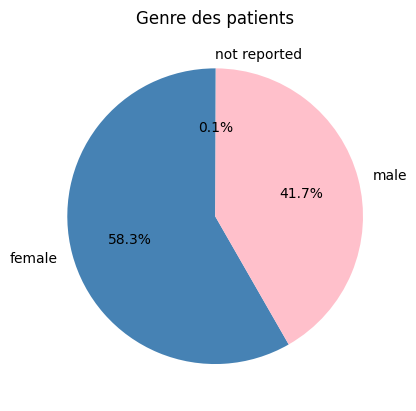

In [19]:
labels_gender = []
genders = []

for demographic in data["demographic"]:
    value = demographic["gender"]
    add_values_per_category(labels_gender, genders, value)


plt.pie(
    genders,
    labels=labels_gender,
    autopct="%1.1f%%",
    startangle=90,
    colors=["steelblue", "pink"],
)
plt.title("Genre des patients")
plt.show()

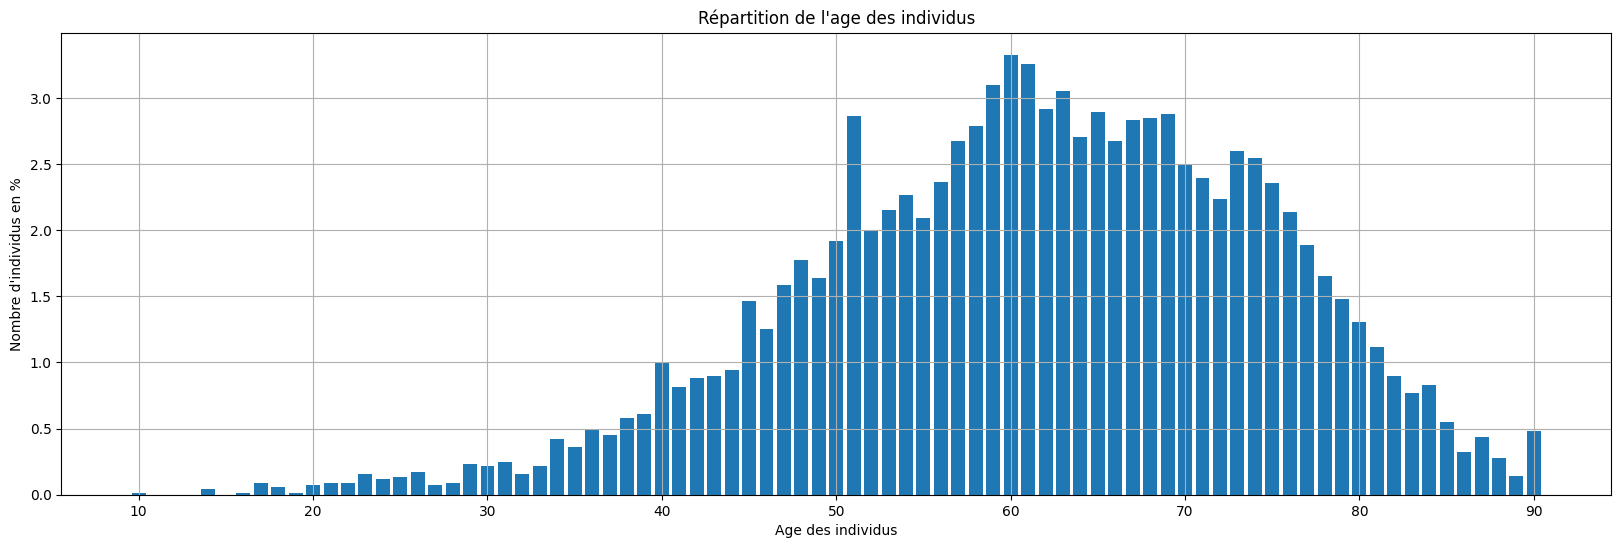

In [20]:
age = []
labels_age = []

for demographic in data["demographic"]:
    value = demographic["age_at_index"]
    if value == None:
        value = 51
    add_values_per_category(labels_age, age, value)

for pos in range(0, len(age)):
    age[pos] = age[pos] * 100 / len(data)


plt.figure(figsize=(20, 6))
plt.bar(labels_age, age)
plt.xlabel("Age des individus")
plt.ylabel("Nombre d'individus en %")
plt.title("Répartition de l'age des individus")
plt.grid()
plt.show()

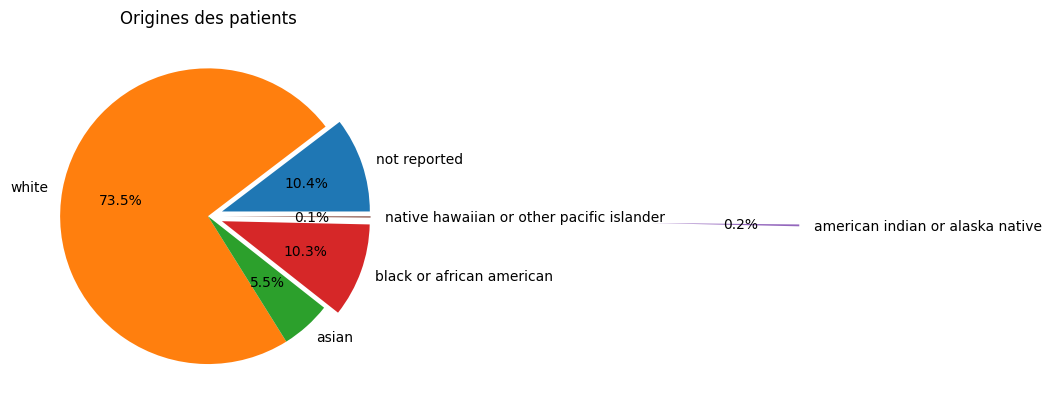

In [21]:
race = []
labels_race = []

for demographic in data["demographic"]:
    value = demographic["race"]
    add_values_per_category(labels_race, race, value)

explode = (0.1, 0, 0, 0.1, 3, 0.1)


plt.pie(race, explode = explode, labels = labels_race, autopct = "%1.1f%%")
plt.title("Origines des patients")
plt.show()

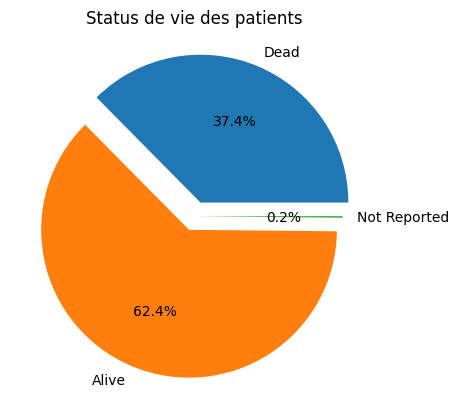

In [22]:
status = []
labels_status = []

for demographic in data["demographic"]:
    value = demographic["vital_status"]
    add_values_per_category(labels_status, status, value)

explode = (0.1, 0.1, 0)


plt.pie(status, explode=explode, labels=labels_status, autopct="%1.1f%%")
plt.title("Status de vie des patients")
plt.show()

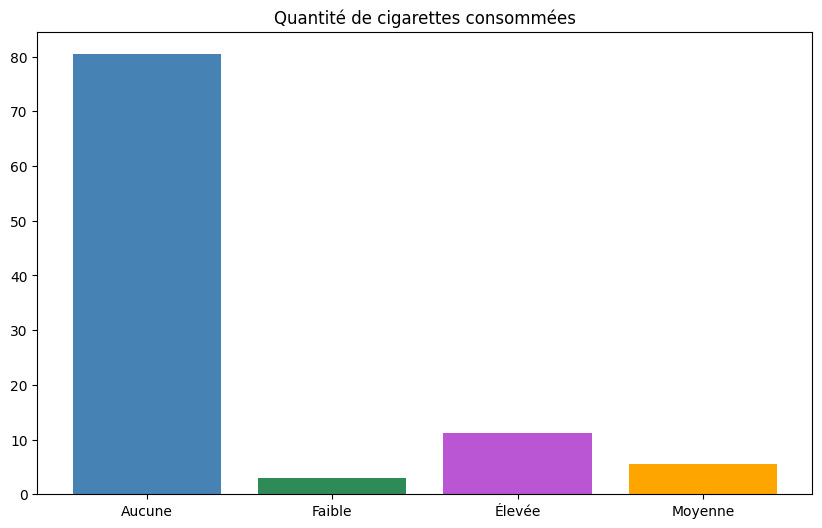

In [23]:
cigarettes = []
labels_cigarettes = []

for exposures in data["exposures"]:
    for exposure in exposures:
        value = "Élevée"
        if exposure["cigarettes_per_day"] == None:
            value = "Aucune"
        elif exposure["cigarettes_per_day"] < 1:
            value = "Faible"
        elif exposure["cigarettes_per_day"] < 2:
            value = "Moyenne"

    add_values_per_category(labels_cigarettes, cigarettes, value)

for pos in range(0, len(cigarettes)):
    cigarettes[pos] = cigarettes[pos] * 100 / len(data)


plt.figure(figsize=(10, 6))
plt.bar(labels_cigarettes, cigarettes, color=palette)
plt.title("Quantité de cigarettes consommées")
plt.show()

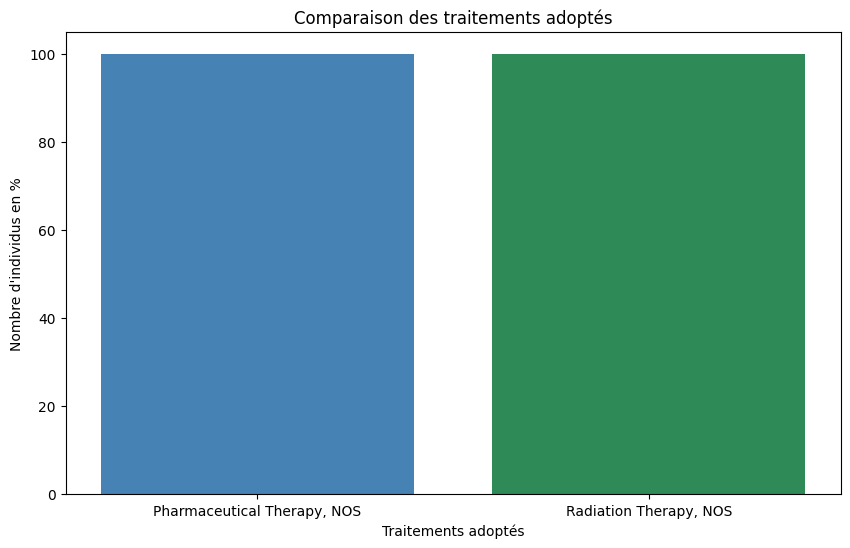

In [24]:
value_treatments = []
labels_treatments = []

for diagnoses in data["diagnoses"]:
    for diagnose in diagnoses:
        treatments = diagnose["treatments"]

        for treatment in treatments:
            if treatment != 1: # TODO
                value = treatment["treatment_type"]
                add_values_per_category(labels_treatments, value_treatments, value)

for pos in range(0, len(value_treatments)):
    value_treatments[pos] = value_treatments[pos] * 100 / len(data)


plt.figure(figsize=(10, 6))
plt.bar(labels_treatments, value_treatments, color=palette)
plt.xlabel("Traitements adoptés")
plt.ylabel("Nombre d'individus en %")
plt.title("Comparaison des traitements adoptés")
plt.show()

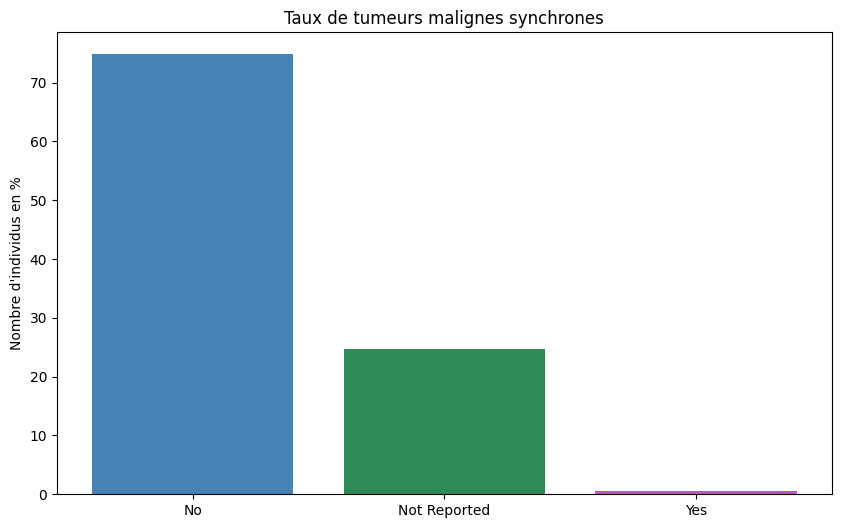

In [25]:
synchronous_malignancy = []
labels_synchronous_malignancy = []

for diagnoses in data["diagnoses"]:
    for diagnose in diagnoses:
        value = diagnose["synchronous_malignancy"]
        add_values_per_category(labels_synchronous_malignancy, synchronous_malignancy, value)

for pos in range(0, len(synchronous_malignancy)):
    synchronous_malignancy[pos] = synchronous_malignancy[pos] * 100 / len(data)

plt.figure(figsize=(10, 6))
plt.bar(labels_synchronous_malignancy, synchronous_malignancy, color=palette)
plt.ylabel("Nombre d'individus en %")
plt.title("Taux de tumeurs malignes synchrones")
plt.show()

      Age  Gender                    Treatment
0      75  female  Pharmaceutical Therapy, NOS
1      30  female       Radiation Therapy, NOS
2      45  female  Pharmaceutical Therapy, NOS
3      66    male  Pharmaceutical Therapy, NOS
4      61  female       Radiation Therapy, NOS
...   ...     ...                          ...
6878   76    male       Radiation Therapy, NOS
6879   57    male  Pharmaceutical Therapy, NOS
6880   39    male       Radiation Therapy, NOS
6881   85  female  Pharmaceutical Therapy, NOS
6882   59  female  Pharmaceutical Therapy, NOS

[6883 rows x 3 columns]


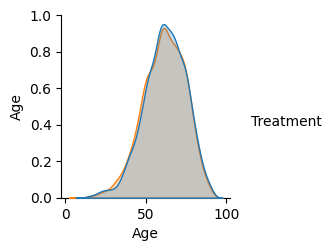

In [26]:
# 1er traitement 2e traitement qui

age_list = []
gender_list = []
treatment_list = []

for demographic in data["demographic"]:
    age = demographic["age_at_index"]
    if age == None:
        age = 51
    age_list.append(int(age))

    gender = demographic["gender"]
    gender_list.append(gender)

for diagnoses in data["diagnoses"]:
    for diagnose in diagnoses:
        treatments = diagnose["treatments"]
        first_treatment = treatments[0]["treatment_type"]
        treatment_list.append(first_treatment)

relation_status_treatment = pd.DataFrame({
    "Age": age_list,
    "Gender": gender_list,
    "Treatment": treatment_list
})

print(relation_status_treatment)

sns.pairplot(data=relation_status_treatment, hue='Treatment')
plt.show()

# sns.stripplot(x='Age', y='Treatment', data=relation_status_treatment, jitter=True, alpha=0.7)
# plt.show()